## Otros modelos de Machine Learning

### Caso de estudio: Análisis de abandono de clientes (Customer Churn Analysis)

Modelar el abandono (chrun) significa comprender qué mantiene al cliente comprometido con nuestro producto. Su objetivo de análisis es predecir o describir la tasa de abandono, es decir, la tasa a la que el cliente abandona o cesa la suscripción a un servicio. Su valor radica en el hecho de que atraer nuevos clientes suele ser más costoso que retener a los existentes. Por esa razón, las empresas de suscripción basadas en negocios suelen tener políticas proactivas para la retención de clientes.

En este caso de estudio, nuestro objetivo es crear un modelo basado en el aprendizaje automático para la predicción de la rotación de clientes en los datos de una empresa de telecomunicaciones. Cada fila del conjunto de datos representa un cliente telefónico suscrito. Cada columna contiene atributos del cliente, como el número de teléfono, los minutos de llamadas utilizados durante diferentes momentos del día, los cargos incurridos por los servicios, la duración de la cuenta de por vida y si el cliente sigue siendo cliente o no.

Este caso está parcialmente inspirado en el análisis de Eric Chiang sobre la tasa de abandono. Los datos están disponibles en el conjunto de datos de los repositorios de aprendizaje automático de la Universidad de California en Irvine.

El conjunto completo de atributos/features es el siguiente:

+ State: categorical, for the 50 states and the District of Columbia
+ Account length: integer-valued, how long an account has been active 
+ Area code: categorical
+ Phone number: customer ID
+ International Plan: binary feature, yes or no
+ VoiceMail Plan: binary feature, yes or no
+ Number of voice mail messages: integer-valued
+ Total day minutes: continuous, minutes customer used service during the day
+ Total day calls: integer-valued
+ Total day charge: continuous
+ Total evening minutes: continuous, minutes customer used service during the evening
+ Total evening calls: integer-valued
+ Total evening charge: continuous
+ Total night minutes: continuous, minutes customer used service during the night
+ Total night calls: integer-valued
+ Total night charge: continuous
+ Total international minutes: continuous, minutes customer used service to make international calls
+ Total international calls: integer-valued
+ Total international charge: continuous
+ Number of calls to customer service: integer-valued

In [1]:
from __future__ import division
import pandas as pd
import numpy as np

churn_df = pd.read_csv('files/churn.csv')
col_names = churn_df.columns.tolist()

print ("Column names:")
print (col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
churn_df[to_show].head(6)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


In [2]:
# Separar el target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# Remoción de columnas no utilizadas
to_drop = ['State','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1)

# si/no convertidos a valores booleanos
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Caracteristicas para ser utilizadas porsteriormente
features = churn_feat_space.columns

X = churn_feat_space.values.astype(np.float)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 18 features
Unique target labels: [0 1]


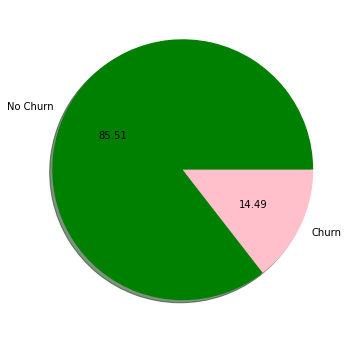

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],colors=['green','pink'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)


In [5]:
# guaradar para uso futuro
import pickle # para serializar datos
ofname = open('churn_data.pkl', 'wb')
s = pickle.dump([X,y,features],ofname)
ofname.close()

### Nearest Neighbors

Los Nearest neighbors son miembros de las familias de aprendizaje basado en instancias. Estos modelos se basan en la evaluación de una función que depende del punto que estemos consultando y entrenando los datos. Los Nearest neighbors es la más simple de estas técnicas. El fundamento de este modelo es el siguiente: cada conjunto de datos de entrenamiento puede verse como un caso/problema resuelto. Por lo tanto, dada una nueva instancia de problema, podemos recuperar el caso más similar en nuestro conjunto de datos y aplicar la misma solución. En el caso de la clasificación, esto significa que seleccionamos la etiqueta del ejemplo de datos más similar en nuestro conjunto de entrenamiento.

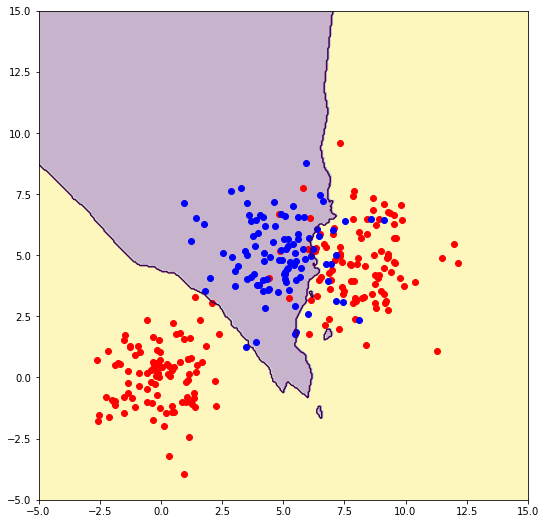

In [6]:
# Ejemplo.

MAXN=100
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

from sklearn import neighbors
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];

# Evaluar el modelo para un peso dado
clf = neighbors.KNeighborsClassifier(11)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)


+ El límite es lineal por partes. Está compuesto por aristas del diagrama de Voronoi.
+ El clasificador se ajusta perfectamente a los datos de entrenamiento. Agregar o eliminar un punto de datos puede cambiar en gran medida el límite. Esto implica que la complejidad del método es grande.
+ El componente clave del clasificador de vecinos más cercanos es la noción de similitud/distancia.

Recuerde que la regularización modela explícitamente la complejidad. La regularización suele ser un término de penalización. En los vecinos más cercanos, podemos penalizar las soluciones con un pequeño "apoyo" mediante el uso de una votación mayoritaria en las muestras de datos de $k$ más cercanas a la muestra de la consulta.

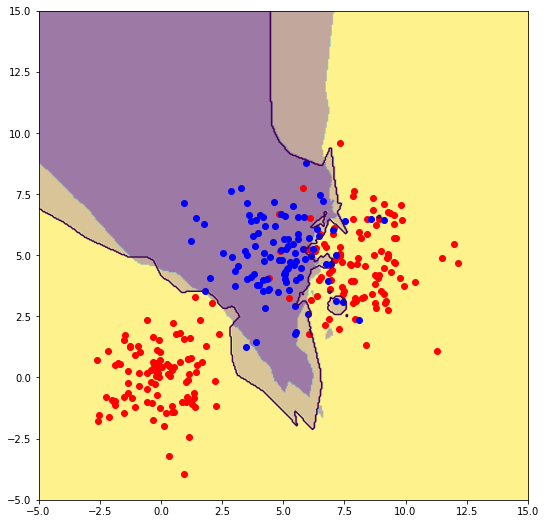

In [7]:

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

clf = neighbors.KNeighborsClassifier(3)
clf.fit(X,y.ravel())
Z2=clf.predict(data)
Z2.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.4, vmin=-1, vmax=1)
plt.imshow(Z2, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.2, vmin=-1, vmax=1)

plt.contour(XX,YY,Z2,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

### Churn classification con nearest neighbors.

Así que volvamos a analizar el problema de la predicción de la rotación de clientes (customer churn prediction.). Podemos ajustar un  1-Nearest Neighbor classifier y verificar el resultado.

In [8]:
# Recuperar los datos Churn
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
print ('Carga correcta')

Carga correcta


In [11]:
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics
acc = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits()
# Construcción de los valores predichos y 
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = neighbors.KNeighborsClassifier(n_neighbors=1)
    dt.fit(X_train,y_train)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))


Mean accuracy: 0.8043811427619524


<ipython-input-12-eaa8645549f4>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
<ipython-input-12-eaa8645549f4>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


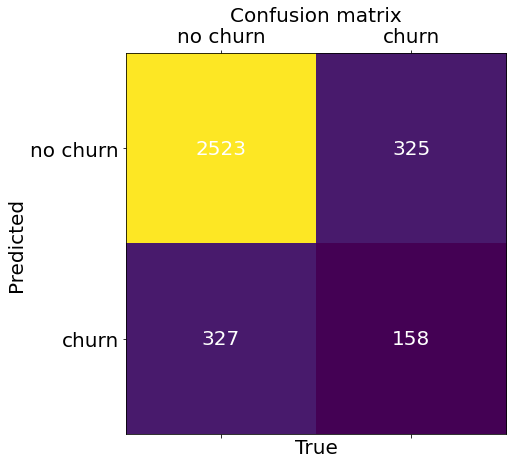

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2850
           1       0.33      0.33      0.33       483

    accuracy                           0.80      3333
   macro avg       0.61      0.61      0.61      3333
weighted avg       0.80      0.80      0.80      3333



In [12]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

Este es un resultado malo. Recuerde que al seleccionar siempre la clase 'sin abandono' ('no churn') deberíamos obtener alrededor de $85\% $ de precisión. Como se señaló antes, la definición de distancia es fundamental. En NN estamos usando la distancia euclidiana. Las distancias asumen que todas las variables operan a la misma escala, es decir, todas son conmensurables. Un cambio en una unidad en una de las variables es equivalente a un camio importante. En este conjunto de datos, esto no sucede. Por ejemplo, los valores de los códigos de área están alrededor de 400, mientras que si el cliente disfruta de un plan internacional toma los valores 0 y 1. Por lo tanto, podemos tener en cuenta estos cambios escalando las funciones. La forma más estándar de hacer esto es la normalización o estandarización de funciones. En esta técnica de preprocesamiento, cada característica se escala para tener una media cero y una desviación estándar unitaria (como hemos visto varias veces en clases).

In [13]:
# Estandarización de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
from sklearn import metrics
acc_snooping = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits()

# Constucción de valores y
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = neighbors.KNeighborsClassifier(1)
    dt.fit(X_train,y_train)
    yhat[test_index] = dt.predict(X_test)
    acc_snooping[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc_snooping)))


Mean accuracy: 0.8682825254039648


<ipython-input-18-eaa8645549f4>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
<ipython-input-18-eaa8645549f4>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


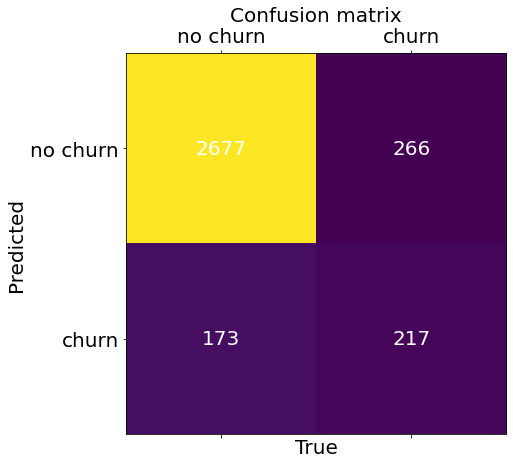

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2850
           1       0.56      0.45      0.50       483

    accuracy                           0.87      3333
   macro avg       0.73      0.69      0.71      3333
weighted avg       0.86      0.87      0.86      3333



In [18]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

##  Análisis de la matriz de confusión

Este resultado es mucho mejor. Como hemos visto, la precisión puede ser un poco informativa en algunos problemas. Por esta razón, podemos utilizar otras medidas de rendimiento. Las medidas de desempeño clásicas se pueden derivar de la matriz de confusión. 

<ipython-input-19-cb9a5751f9e8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
<ipython-input-19-cb9a5751f9e8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


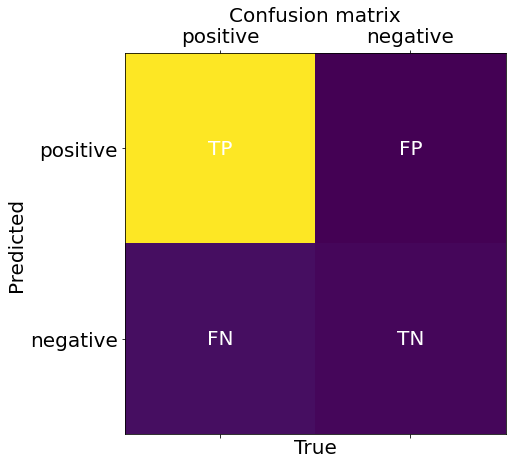

In [19]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    ax.text(0, 0, 'TP', va='center', ha='center',color='white',size=20)
    ax.text(0, 1, 'FN', va='center', ha='center',color='white',size=20)
    ax.text(1, 0, 'FP', va='center', ha='center',color='white',size=20)
    ax.text(1, 1, 'TN', va='center', ha='center',color='white',size=20)            
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['positive', 'negative'])

La matriz está dividida en cuatro cuartos y contiene:

+ True Positives (TP): Muestras positivas predichas como tales.
+ True Negatives (TN): Muestras negativas predichas como tales.
+ False Positives (FP): Muestras negativas pronosticadas como positivas.
+ False Negatives (FN): Muestras positivas pronosticadas como negativas.

La combinación de estos elementos permite definir varias métricas de rendimiento:

+ Accuracy: 

$$\text{accuracy}=\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$

+ Sensitivity or Recall: 

$$\text{sensitivity}=\frac{\text{TP}}{\text{Real Positives}}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$

+ Specificity:

$$\text{specificity}=\frac{\text{TN}}{\text{Real Negatives}}=\frac{\text{TN}}{\text{TN}+\text{FP}}$$

+ Precision or Positive Predictive Value:

$$\text{precision}=\frac{\text{TP}}{\text{Predicted Positives}}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$

+ Negative predictive value:

$$\text{NPV}=\frac{\text{TN}}{\text{Predicted Negative}}=\frac{\text{TN}}{\text{TN}+\text{FN}}$$


In [20]:
# Cálculo de métricas
TP = np.sum(np.logical_and(yhat==1,y==1))
TN = np.sum(np.logical_and(yhat==0,y==0))
FP = np.sum(np.logical_and(yhat==1,y==0))
FN = np.sum(np.logical_and(yhat==0,y==1))

print ('TP: ' + str(TP))
print ('TN: ' + str(TN))
print ('FP: ' + str(FP))
print ('FN: ' + str(FN))
print ('sensitivity/recall: '+ str(TP/(TP+FN)))
print ('precision: '+ str(TP/(TP+FP)))


TP: 217
TN: 2677
FP: 173
FN: 266
sensitivity/recall: 0.4492753623188406
precision: 0.5564102564102564


### Decision trees

Los árboles de decisión son otro tipo de estrategia de clasificación intuitiva basada en el paradigma divide y vencerás (divide-and-conquer).

La idea básica en los árboles de decisión es dividir el espacio de exploración en subespacioes (ramas) e ir ajustar un modelo. 

### Modelamiento con Decision tree

Ejemplos:

- Divisiones mediante hiperplanos eje-ortogonales. Esta es la clave que permite la interpretabilidad de los resultados.

- En cada nodo interno probamos el valor de una característica. Se almacenan una característica y un umbral para cada nodo interno.

- Las hojas hacen la predicción de la clase. Si las hojas son puras, tenemos que almacenar la etiqueta de la clase. Si las hojas son impuras, entonces se almacena la fracción de muestras para cada clase y se devuelve su frecuencia cuando se consulta.

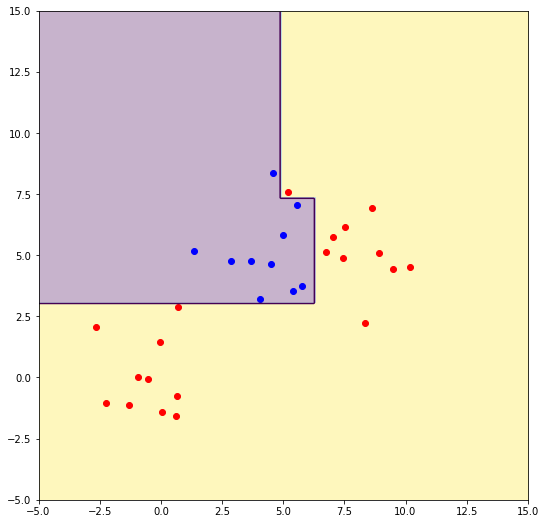

In [21]:
# Construcción de un decision tree

%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=10
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

from sklearn import tree
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

In [106]:
import os
dotfile = tree.export_graphviz(clf, out_file = "toy_tree.dot")

os.system("dot -Tpng toy_tree.dot -o toy_tree.png")

1

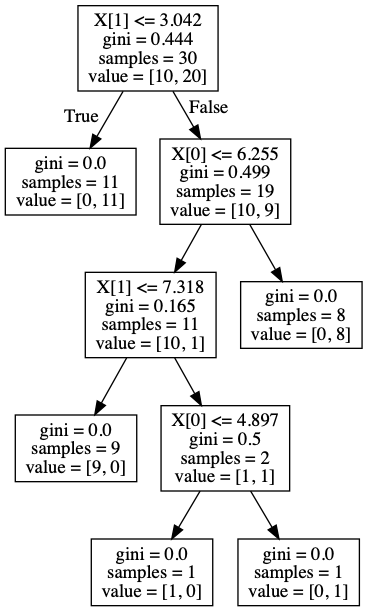

In [107]:
from IPython.core.display import Image
Image("toy_tree.png")

En el arbol, el primer nodo divide el conjunto de entrenamiento usando la función $1$ aplicando el umbral $\leq 3.04$. Como resultado, podemos clasificar correctamente once de los treinta puntos de datos. 

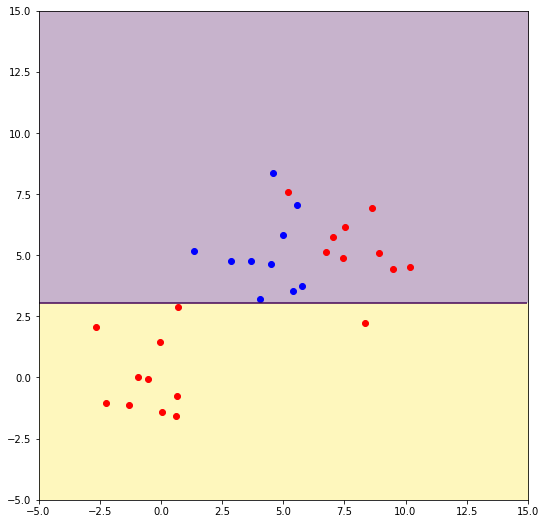

In [109]:
# Ejemplo para ver el límite (de clasificación)
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=1)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')


plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

El segundo nodo divide el conjunto de entrenamiento usando la característica(feature) $0$ aplicando el umbral $\leq 6.25 $. Tenga en cuenta que esto solo se usa en la parte del espacio donde la característica $1$ es mayor que $3.04$. Observe que el espacio azul restante se caracteriza por la siguiente función lógica: $(x_1>3.04) \wedge (x_0\leq 6.25)$.

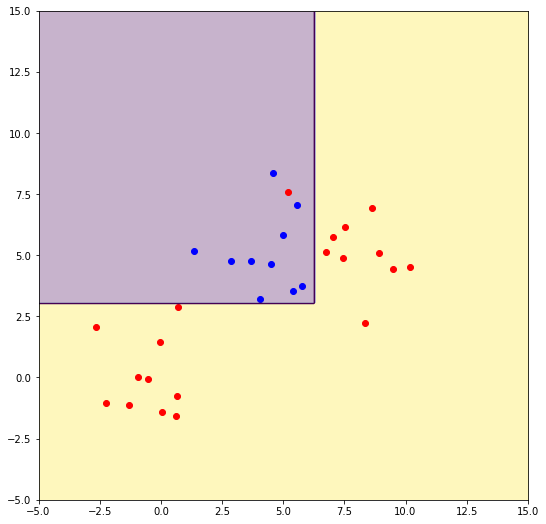

In [110]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

Características de los árboles de decision

+ Los árboles son fáciles de interpretar para los humanos. Puede verse como un conjunto de reglas. Cada camino desde la raíz hasta una hoja del árbol es una combinación Y de las características de umbral.

+ Dado un conjunto de datos finito, los árboles de decisión pueden expresar cualquier función de los atributos de entrada. 

+ Puede haber más de un árbol que se ajuste a los mismos datos. De todos ellos nos gustaría un árbol con un número mínimo de nodos. Pero el problema es NP.

### Aprendizaje en los árboles de decision

Debido a que el problema es NP, podemos recurrir a un algoritmo de construcción codicioso (greedy). Los algoritmos codiciosos eligen la mejor partición binaria actual sin tener en cuenta su impacto en la calidad de las divisiones posteriores.

La idea del algoritmo es la siguiente:

+ Inicializar el algoritmo con un nodo asociado al conjunto de datos completo.

**while** la lista no está vacía
1. Recupere el primer nodo de la lista.
2. Busque los datos asociados a ese nodo.
3. Encuentre un punto de división.
4. Si el nodo se puede dividir, cree los nodos vinculados al nodo principal y colóquelos en la lista de exploración.


#### Criterio de división

Hay muchos criterios de división diferentes. Los más comunes son:

+ Misclassification error
+ Gini index
+ Cross-entropy/Information gain/Mutual information

Sin entrar en detalles, las divisiones de errores de clasificación seleccionan con avidez la división que corrige más datos en cada punto. El índice de Gini y la entropía cruzada modelan probabilísticamente la noción de impureza de un nodo. La división se elige de modo que se maximice la pureza media de los nuevos nodos. Observe que a medida que descendemos en el árbol, la pureza aumenta y eventualmente converge en hojas puras. La entropía mide la sorpresa/información promedio que produce un resultado probabilístico. En una variable binaria, la máxima sorpresa ocurre cuando ambos resultados son igualmente probables (esto debieron haber visto en TIC), uno tiene la máxima incertidumbre sobre el resultado. De lo contrario, la sorpresa disminuye. Este comportamiento también se muestra en el índice de Gini.

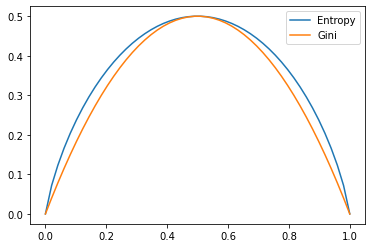

In [111]:
import numpy as np
entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0
gini = lambda p: 1. - (np.array(p)**2).sum()
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p])/2. for p in pvals], label='Entropy')
plt.plot(pvals, [gini([p,1-p]) for p in pvals], label='Gini')
plt.legend()

### Arboles y overfitting

Debido a que los árboles son modelos muy expresivos, pueden modelar cualquier conjunto de entrenamiento perfecta y fácilmente.

Hay dos formas de evitar el sobreajuste en los árboles:

+ No crecer el árbol cuando la división no sea estadísticamente significativa.
+ Crear un árbol completo y luego elimianr ramas no significantes (proceso de poda).

Una de las formas más sencillas de realizar la poda posterior es la "reducción de errores de poda". Así:

1. Divida los datos en entrenamiento y validación
2. Cree un árbol de candidatos en el conjunto de formación.
3. Hágalo hasta que una poda adicional sea dañina
    1. Evaluar el impacto en el conjunto de validación de eliminar cada posible nodo (con descendientes)
     2. Elimine el nodo que mejora el rendimiento.

In [113]:
%reset -f
#Recuperar la Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
features = data[2]
print ('Carga correcta.')

Carga correcta.


In [114]:
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics


kf=model_selection.KFold(n_splits=5, shuffle=False, random_state=0)
kf.get_n_splits()
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = tree.DecisionTreeClassifier(criterion='entropy')
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.9162950056503281


C:\Users\ctipa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<ipython-input-115-85501ba2c41c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
<ipython-input-115-85501ba2c41c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


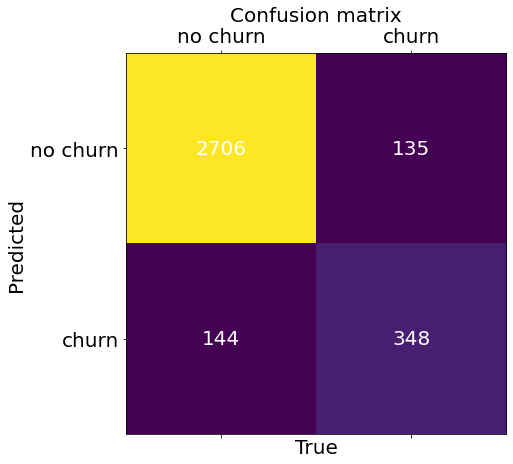

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2850
           1       0.71      0.72      0.71       483

    accuracy                           0.92      3333
   macro avg       0.83      0.83      0.83      3333
weighted avg       0.92      0.92      0.92      3333



In [115]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

In [116]:
# Métricas
TP = np.sum(np.logical_and(yhat==1,y==1))
TN = np.sum(np.logical_and(yhat==0,y==0))
FP = np.sum(np.logical_and(yhat==1,y==0))
FN = np.sum(np.logical_and(yhat==0,y==1))

print ('TP: ' + str(TP))
print ('TN: ' + str(TN))
print ('FP: ' + str(FP))
print ('FN: ' + str(FN))
print ('sensitivity/recall: '+ str(TP/(TP+FN)))
print ('precision: '+ str(TP/(TP+FP)))

TP: 348
TN: 2706
FP: 144
FN: 135
sensitivity/recall: 0.7204968944099379
precision: 0.7073170731707317


Observe que al usar un árbol de decisión, el recall aumentó en $30\%$ mientras que la precisión se encuentra en un nivel similar al de the nearest neighbors.

In [117]:
import os
# Revisión del los primeros niveles del árbol
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
dt.fit(Xs,y)

#Exportar el árbol

dotfile = tree.export_graphviz(dt, out_file = "churn.dot", feature_names = features)


os.system("dot -Tpng churn.dot -o churn.png")

1

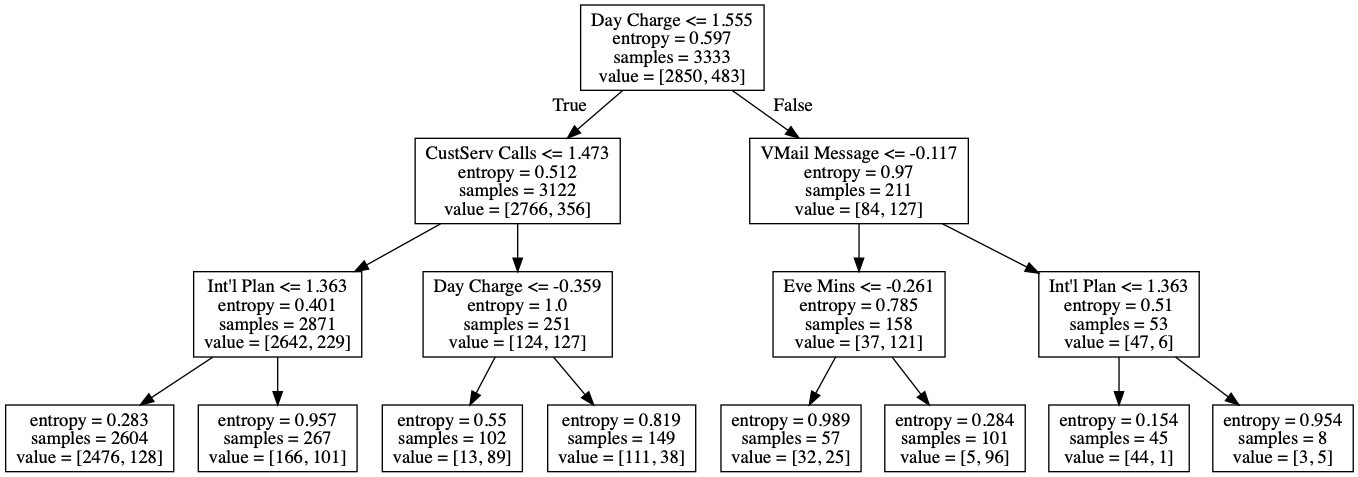

In [118]:
from IPython.core.display import Image
Image("churn.png")

Observe la primera división de características y los valores de la entropía de acuerdo con la división.

In [120]:
entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0

# Revision de la entropía del nodo raiz
# Hay 2850 muestras de clientes que permanecen en la empresa. La frecuencia es
proot = 2850/3333
#La entropia
print( 'Entropía del nodo raíz: '+ str(entropy([proot,1-proot])))

# Después de la división tenemos las siguientes frecuencias para los hijos izquierdo y derecho
pleft = np.sum([2476,166,13,111])/3122 # información nodo izquierdo
pright = np.sum([32,5,44,3])/211 # información nodo derecho

print( 'Entropía del nodo izquierdo: '+ str(entropy([pleft,1-pleft])))
print ('Entropía del nodo derecho: '+ str(entropy([pright,1-pright])))

I = entropy([proot,1-proot]) - 3122/3333*entropy([pleft,1-pleft])+211/3333*entropy([pright,1-pright])

print ('Gain: '+ str(I))



Entropía del nodo raíz: 0.5969661117996699
Entropía del nodo izquierdo: 0.5119516728279073
Entropía del nodo derecho: 0.9698308534774178
Gain: 0.1788206535083433


La división reduce la entropía promedio de los hijos, por lo que las divisiones son más puras.

+ Observe que debido a que hemos restringido (con fines de visualización) la profundidad máxima del árbol, las hojas no son puras.
+ Analizando las hojas podemos ver que la mayoría de los clientes que se enganchan al plan comparten las siguientes condiciones:

$$(\text{Day Charge} \leq 1.5) \wedge (\text{Customer Service Calls} \leq 1.47) \wedge (\text{International Plan} \leq 1.36)$$

Tenga en cuenta que estos valores están preprocesados y, como tales, transmiten poca información interpretable. Por lo tanto, para dar sentido a las condiciones anteriores, tenemos que invertir la transformación. Podemos hacerlo de varias formas, una forma es utilizar la interpolación y la consulta de la característica de interés.

Day Charge < 44.91227759396026
Customer service calls <3.4963380050348625
International Plan < nan


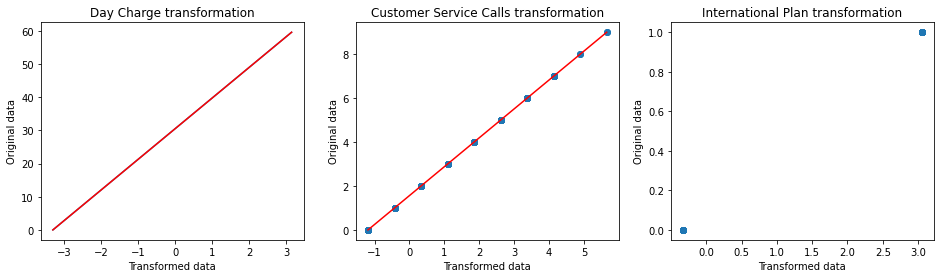

In [121]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
idx_global = features.tolist()

#Day Charge
plt.subplot(1,3,1)
idx = idx_global.index('Day Charge')
selection = X[:,idx]
idx_sort = np.argsort(selection)
plt.plot(Xs[idx_sort,idx], X[idx_sort,idx])
spline = interpolate.UnivariateSpline(x=Xs[idx_sort,idx], y=X[idx_sort,idx])
plt.plot(Xs[idx_sort,idx],spline(Xs[idx_sort,idx]),'r')
plt.title('Day Charge transformation')
ax = plt.gca()
ax.set_xlabel('Transformed data')
ax.set_ylabel('Original data')
print ('Day Charge < '+str(spline([1.55])[0]))


#CustServ Calls
plt.subplot(1,3,2)
idx = idx_global.index('CustServ Calls')
selection = X[:,idx]
idx_sort = np.argsort(selection)
plt.plot(Xs[idx_sort,idx], X[idx_sort,idx],'o')
spline = interpolate.UnivariateSpline(x=Xs[idx_sort,idx], y=X[idx_sort,idx])
plt.plot(Xs[idx_sort,idx],spline(Xs[idx_sort,idx]),'r')
plt.title('Customer Service Calls transformation')
ax = plt.gca()
ax.set_xlabel('Transformed data')
ax.set_ylabel('Original data')
print ('Customer service calls <' + str(spline([1.47])[0]))

#International Plan
plt.subplot(1,3,3)
idx = idx_global.index("Int'l Plan")
selection = X[:,idx]
idx_sort = np.argsort(selection)
plt.plot(Xs[idx_sort,idx], X[idx_sort,idx],'o')
spline = interpolate.UnivariateSpline(x=Xs[idx_sort,idx], y=X[idx_sort,idx])
plt.plot(Xs[idx_sort,idx],spline(Xs[idx_sort,idx]),'r')
plt.title('International Plan transformation')
ax = plt.gca()
ax.set_xlabel('Transformed data')
ax.set_ylabel('Original data')
print ('International Plan < ' + str(spline([1.36])[0]))

fig = plt.gcf()
fig.set_size_inches(16,4)

Así, el perfil final de los 2476 clientes que no abandonan tiene en común:

$$(\text{Day Charge} \leq 45) \wedge (\text{Customer Service Calls} < 4) \wedge (\text{International Plan}= \text{NO})$$

### Random Forest

La técnica de bosque aleatorio introduce una aleatorización sobre la característica seleccionada para construir cada árbol en el conjunto con el fin de mejorar la diversidad en un intento de reducir (más) la varianza evan.

In [122]:
%reset -f
from sklearn import tree
import numpy as np
def train_random_forest(X,y,C,F):
    F=int(np.ceil(np.sqrt(X.shape[1])))
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        feat_idx=np.random.permutation(np.arange(X.shape[1]))[:F]
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:].copy()
        Xr=Xr[:,feat_idx]
        yr=y[idx]
        clf_list.append((clf.fit(Xr,yr.ravel()),feat_idx))
    return clf_list


def test_random_forest(X,clf_list):
    yhat=np.zeros((X.shape[0],len(clf_list)))
    i=0
    for dt,feat_idx in clf_list:
        yhat[:,i]=dt.predict(X[:,feat_idx])
        i=i+1
    return np.sign(np.mean(yhat,axis=1)),yhat

In [124]:
#Recuperar el Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = 2*data[1]-1
print ('Labels: '+ str(np.unique(y)))
features = data[2]
print ('Carga correcta')

Labels: [-1  1]
Carga correcta


In [125]:
from sklearn import metrics
clf_list = train_random_forest(X,y,51,5)
yhat,yk = test_random_forest(X,clf_list)
acc = metrics.accuracy_score(yhat, y)
print (yk.shape)
print (np.sum(np.mean(yk,axis=1)>0))
print (acc)

(3333, 51)
483
1.0


In [126]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn import metrics


kf=model_selection.KFold(n_splits=5, shuffle=False, random_state=0)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
# Valores predichos y
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = ensemble.RandomForestClassifier(n_estimators=51)
    dt.fit(X_train,y_train)
    yhat[test_index]=dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print (acc)
print (np.unique(yhat))
print (np.unique(y_test))
print ('Mean accuracy: '+ str(np.mean(acc)))

C:\Users\ctipa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.94752624 0.95352324 0.95802099 0.96096096 0.95045045]
[-1  1]
[-1  1]
Mean accuracy: 0.9540963752358056


<ipython-input-84-5c79f0d124ed>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
<ipython-input-84-5c79f0d124ed>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


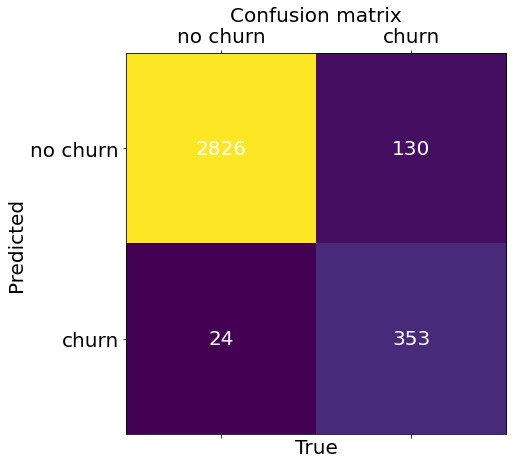

              precision    recall  f1-score   support

          -1       0.96      0.99      0.97      2850
           1       0.94      0.73      0.82       483

    accuracy                           0.95      3333
   macro avg       0.95      0.86      0.90      3333
weighted avg       0.95      0.95      0.95      3333



In [84]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()
draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))